## **서울시 작은도서관 데이터 분석**

### **데이터 불러오기**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# 엑셀 불러오기
data = pd.read_excel('/content/drive/MyDrive/Contest/Library/Dataset/도서관_현황정보.xlsx')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   도서관명                   954 non-null    object 
 1   분관여부                   954 non-null    object 
 2   도서관 유형                 954 non-null    int64  
 3   일평균                    954 non-null    int64  
 4   연간 총 운영일               954 non-null    int64  
 5   건물면적(㎡)                954 non-null    float64
 6   열람(석)                  954 non-null    int64  
 7   현재 총 보유장서의 수(권)        954 non-null    int64  
 8   현재 총 보유 연속간행물의 수(종)    954 non-null    int64  
 9   운영위원회
구성유무             954 non-null    object 
 10  정기모임 횟수                954 non-null    int64  
 11  PC현황 유무                954 non-null    object 
 12  상근직원(명)                954 non-null    int64  
 13  시간제직원(명)               954 non-null    int64  
 14  정기적자원봉사자(명)            954 non-null    int64  
 15  비정기적자원

### **데이터 전처리**

In [33]:
# 중복 컬럼인 주소 삭제
data.drop('주소', axis=1, inplace=True)
# 중복 행 지우기
data.drop_duplicates(inplace=True)

In [34]:
data.columns

Index(['도서관명', '분관여부', '도서관 유형', '일평균', '연간 총 운영일', '건물면적(㎡)', '열람(석)',
       '현재 총 보유장서의 수(권)', '현재 총 보유 연속간행물의 수(종)', '운영위원회\n구성유무', '정기모임 횟수',
       'PC현황 유무', '상근직원(명)', '시간제직원(명)', '정기적자원봉사자(명)', '비정기적자원봉사자(명)',
       '사서자격증보유자', '직원 교육시간(시간)', '재정자립도', '예산합계(원)', '도서관외대출여부', '연간도서대출권수',
       '연간 총 이용자수(명)', '등록된 \n총 이용자수\n(회원등록자 수)', '상호대차서비스 제공유무',
       '독서/문화프로그램 실시여부', '운영상태', '경도', '위도', '지번주소'],
      dtype='object')

In [35]:
# 컬럼명 변경
data.columns = ['Name','Branch', 'Type', 'Operating_hours', 'Operating_days', 'Area', 'Room', 'Books', 'Publications', 'Committee', 'Meeting', 'PC', 'Full_time', 'Part_time', 'Regular_volunteer', 'Irregular_volunteer',
                'License', 'Training_time', 'Financial', 'Budget', 'Off_library', 'Borrow', 'Target', 'Registration', 'Mutual_borrow', 'Program', 'Operation_status', 'Longitude', 'Latitude', 'Address']

#### 주소 데이터 이용하여 변수 추출

In [36]:
# 주소 데이터 접근, iterrows 사용가능
for index, row in data.iterrows():
  address = str(data.loc[index, 'Address'])
  data.loc[index, 'Gu'] = address.split(sep=' ')[1]

In [37]:
data[['Gu']]

,Gu
0,종로구
1,종로구
2,종로구
3,종로구
4,종로구
...,...
947,강동구
948,강동구
949,강동구
951,강동구


#### 파생변수를 이용하여 병합

In [38]:
seoul_class = pd.read_excel('/content/drive/MyDrive/Contest/Library/Dataset/서울시 학급 수.xlsx')
seoul_population = pd.read_excel('/content/drive/MyDrive/Contest/Library/Dataset/서울시 구별 인구수.xlsx')

In [39]:
data_merge = data.merge(seoul_class, on='Gu', how='left')
data_merge = data_merge.merge(seoul_population, on='Gu', how='left')

In [40]:
data_merge.head(1)

,Name,Branch,Type,Operating_hours,Operating_days,Area,Room,Books,Publications,Committee,...,0~9,10,20,30,40,50,60,70,80,90+
0,경희궁자이3단지 작은도서관,N,2,8,365,65.6,28,2556,0,N,...,7288,10941,27136,20882,22019,25935,20724,11712,6167,985


### **시각화**

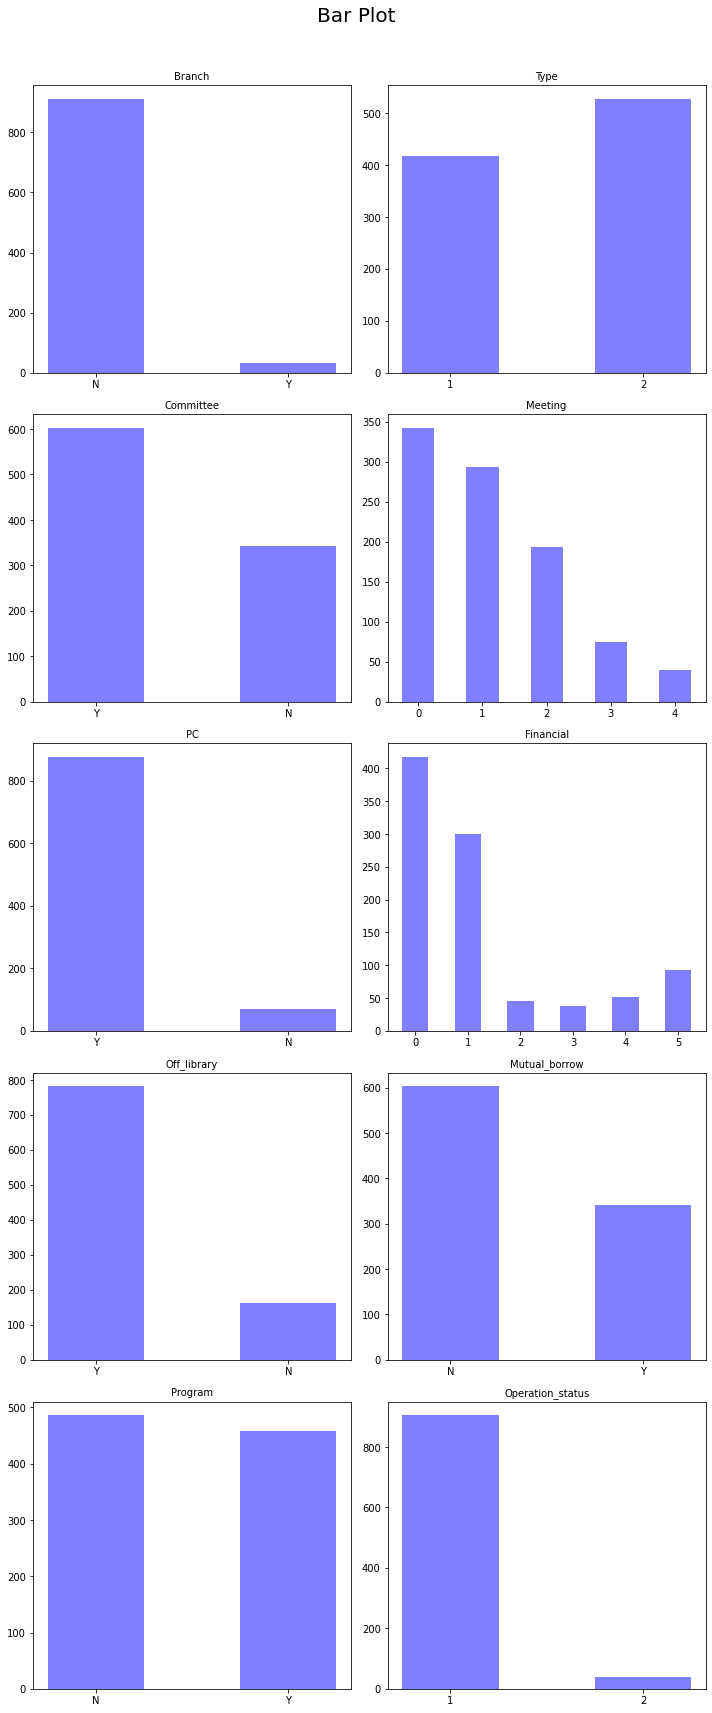

In [60]:
# 범주형 변수 시각화
cate_col = ['Branch', 'Type', 'Committee', 'Meeting', 'PC', 'Financial','Off_library', 'Mutual_borrow', 'Program', 'Operation_status']

plt.figure(figsize=(10,25))
plt.suptitle("Bar Plot", fontsize=20)

for i in range(len(cate_col)):
    plt.subplot(5, 2, i+1)
    plt.title(cate_col[i], fontsize=10)
    temp = data[cate_col[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


column name: Operating_hours
column name: Operating_days
column name: Area


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

column name: Room
column name: Books
column name: Publications


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

column name: Full_time
column name: Part_time
column name: Regular_volunteer


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

column name: Irregular_volunteer
column name: License
column name: Training_time


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

column name: Budget


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


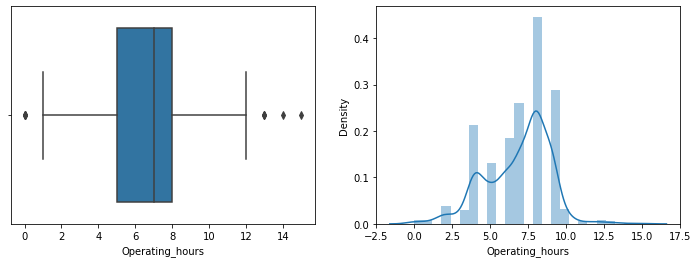

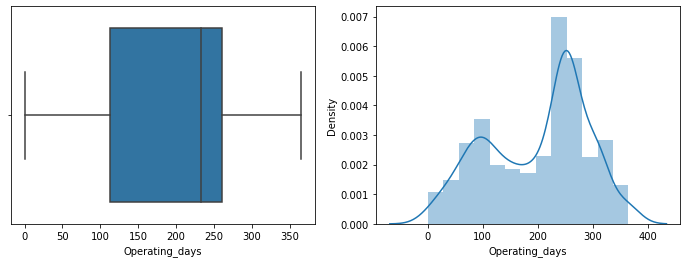

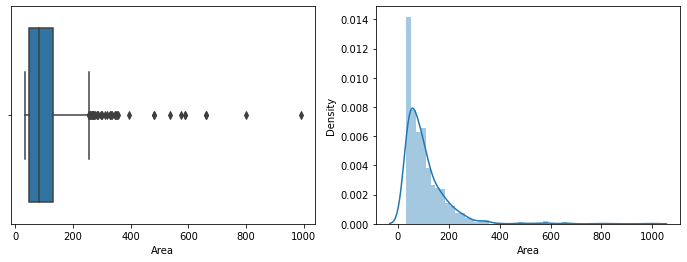

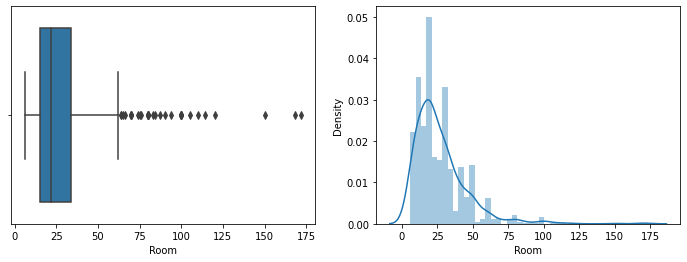

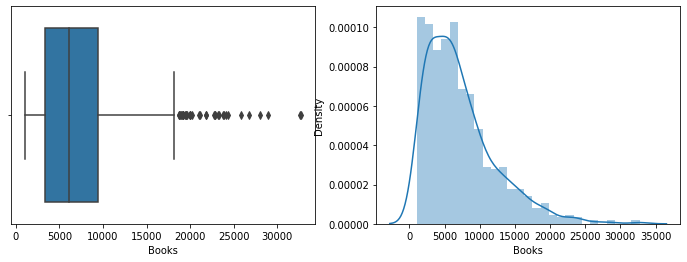

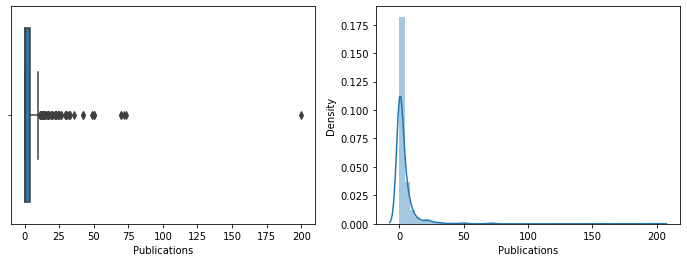

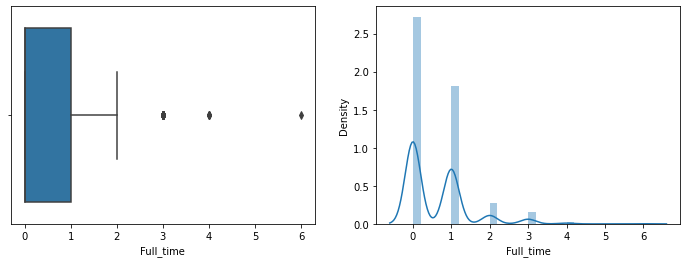

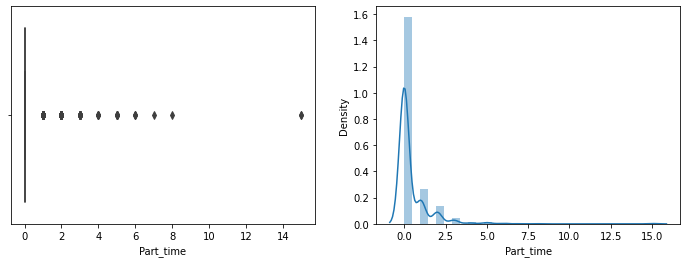

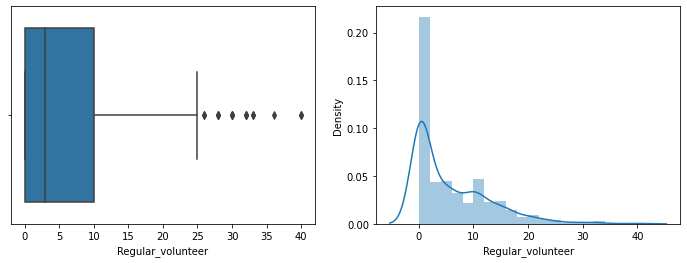

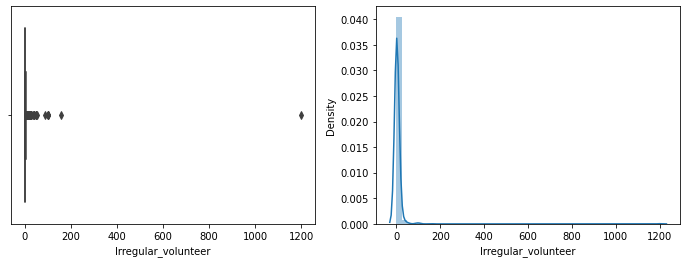

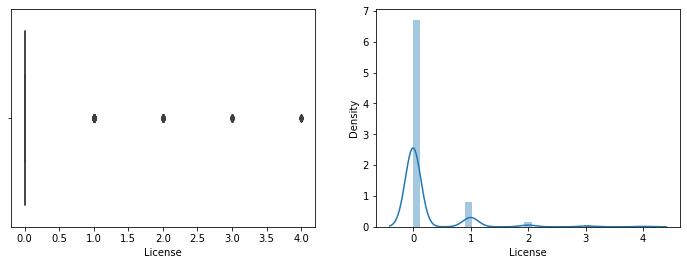

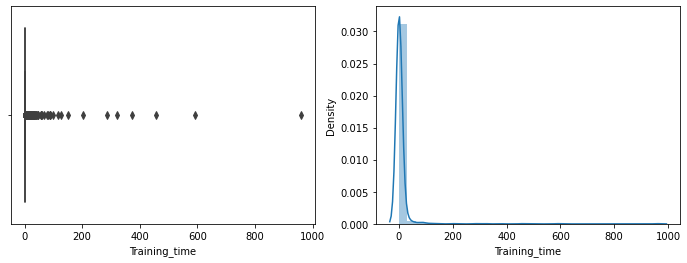

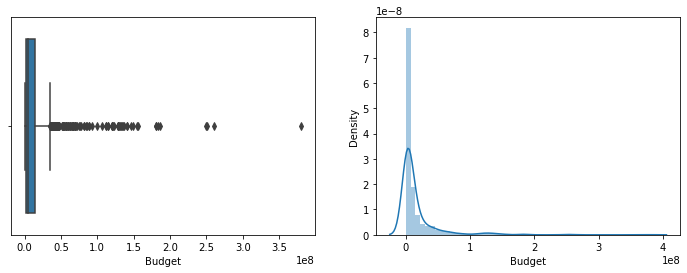

In [51]:
# 수치형 변수 시각화
def show_hist(df, columns):
    for column in columns:
        print('column name:', column)
        fig, axs = plt.subplots(figsize=(12,4), nrows=1, ncols=2 ,squeeze=False)
        sns.boxplot(df[column], ax=axs[0][0])
        sns.distplot(df[column], ax=axs[0][1])

numeric_col = ['Operating_hours', 'Operating_days', 'Area', 'Room', 'Books', 'Publications', 'Full_time', 'Part_time', 'Regular_volunteer', 'Irregular_volunteer', 'License', 'Training_time', 'Budget']
show_hist(data_merge, numeric_col)

#### Forium 시각화

### **모델링 및 분석**

In [ ]:
# # 범주형 변수 인코딩
# ohe_data = pd.get_dummies(data_merge, columns=cate_col)
# ## 라벨인코더 실행해보기

# 스케일링
# 변수제거